In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Activation function (Sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

In [5]:
# Define XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [6]:
# Neural network architecture
input_units = 2
hidden_units1 = 2
hidden_units2 = 2
output_units = 1

In [7]:
# Learning rate and number of epochs
learning_rate = 0.1
epochs = 10000

In [8]:
# Initialize weights and biases
np.random.seed(0)
weights_input_hidden1 = np.random.uniform(size=(input_units, hidden_units1))
weights_hidden1_hidden2 = np.random.uniform(size=(hidden_units1, hidden_units2))
weights_hidden2_output = np.random.uniform(size=(hidden_units2, output_units))

bias_hidden1 = np.zeros((1, hidden_units1))
bias_hidden2 = np.zeros((1, hidden_units2))
bias_output = np.zeros((1, output_units))

# Lists to store loss values for plotting
losses = []

In [9]:
# Training loop
for epoch in range(epochs):
    # Forward propagation
    input_layer = X
    z_hidden1 = np.dot(input_layer, weights_input_hidden1) + bias_hidden1
    a_hidden1 = sigmoid(z_hidden1)
    
    z_hidden2 = np.dot(a_hidden1, weights_hidden1_hidden2) + bias_hidden2
    a_hidden2 = sigmoid(z_hidden2)
    
    z_output = np.dot(a_hidden2, weights_hidden2_output) + bias_output
    output_layer = sigmoid(z_output)
    
    # Calculate loss (MSE)
    loss = np.mean((y - output_layer)**2)
    losses.append(loss)
    
    # Backpropagation
    delta_output = 2 * (output_layer - y) * sigmoid_derivative(output_layer)
    
    delta_hidden2 = delta_output.dot(weights_hidden2_output.T) * sigmoid_derivative(a_hidden2)
    delta_hidden1 = delta_hidden2.dot(weights_hidden1_hidden2.T) * sigmoid_derivative(a_hidden1)
    
    # Update weights and biases
    weights_hidden2_output -= a_hidden2.T.dot(delta_output) * learning_rate
    bias_output -= np.sum(delta_output, axis=0, keepdims=True) * learning_rate
    
    weights_hidden1_hidden2 -= a_hidden1.T.dot(delta_hidden2) * learning_rate
    bias_hidden2 -= np.sum(delta_hidden2, axis=0, keepdims=True) * learning_rate
    
    weights_input_hidden1 -= input_layer.T.dot(delta_hidden1) * learning_rate
    bias_hidden1 -= np.sum(delta_hidden1, axis=0, keepdims=True) * learning_rate
    
    if (epoch + 1) % 1 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss}")

Epoch 1, Loss: 0.29314645965513464
Epoch 2, Loss: 0.2872653413338963
Epoch 3, Loss: 0.28193346679733855
Epoch 4, Loss: 0.27716525946535553
Epoch 5, Loss: 0.27295501444633363
Epoch 6, Loss: 0.26928029907527756
Epoch 7, Loss: 0.2661061524699868
Epoch 8, Loss: 0.2633894071059256
Epoch 9, Loss: 0.2610826174346921
Epoch 10, Loss: 0.2591372897106895
Epoch 11, Loss: 0.2575063001330573
Epoch 12, Loss: 0.2561455305073529
Epoch 13, Loss: 0.25501483404370817
Epoch 14, Loss: 0.25407847771076386
Epoch 15, Loss: 0.25330520739226103
Epoch 16, Loss: 0.25266806310393775
Epoch 17, Loss: 0.2521440451669972
Epoch 18, Loss: 0.2517137056739777
Epoch 19, Loss: 0.25136071649628744
Epoch 20, Loss: 0.25107144678039
Epoch 21, Loss: 0.250834569319099
Epoch 22, Loss: 0.25064070568958674
Epoch 23, Loss: 0.2504821137502475
Epoch 24, Loss: 0.2503524171505333
Epoch 25, Loss: 0.2502463742313523
Epoch 26, Loss: 0.2501596825357204
Epoch 27, Loss: 0.2500888147116258
Epoch 28, Loss: 0.2500308815912419
Epoch 29, Loss: 0.249

Epoch 2073, Loss: 0.24563477437976794
Epoch 2074, Loss: 0.24562641088495102
Epoch 2075, Loss: 0.24561802849318023
Epoch 2076, Loss: 0.24560962715352944
Epoch 2077, Loss: 0.2456012068149065
Epoch 2078, Loss: 0.24559276742605302
Epoch 2079, Loss: 0.24558430893554317
Epoch 2080, Loss: 0.2455758312917836
Epoch 2081, Loss: 0.24556733444301254
Epoch 2082, Loss: 0.24555881833729917
Epoch 2083, Loss: 0.2455502829225432
Epoch 2084, Loss: 0.24554172814647407
Epoch 2085, Loss: 0.24553315395665049
Epoch 2086, Loss: 0.2455245603004596
Epoch 2087, Loss: 0.24551594712511665
Epoch 2088, Loss: 0.2455073143776641
Epoch 2089, Loss: 0.245498662004971
Epoch 2090, Loss: 0.24548998995373264
Epoch 2091, Loss: 0.24548129817046968
Epoch 2092, Loss: 0.24547258660152754
Epoch 2093, Loss: 0.24546385519307581
Epoch 2094, Loss: 0.24545510389110753
Epoch 2095, Loss: 0.24544633264143872
Epoch 2096, Loss: 0.2454375413897077
Epoch 2097, Loss: 0.2454287300813742
Epoch 2098, Loss: 0.245419898661719
Epoch 2099, Loss: 0.245

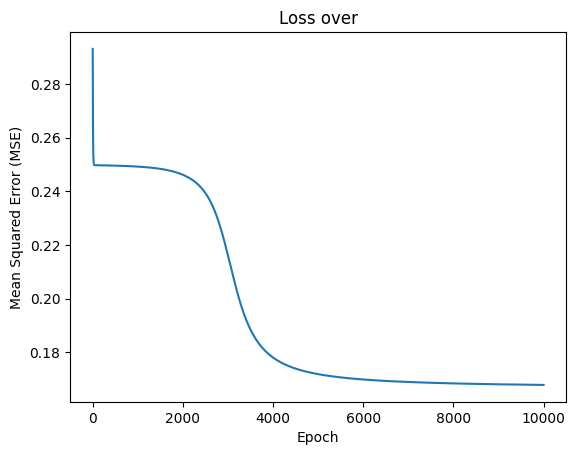

In [10]:
# Plot loss
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss over")
plt.show()

In [11]:
# Testing
test_data = X
z_hidden1 = np.dot(test_data, weights_input_hidden1) + bias_hidden1
a_hidden1 = sigmoid(z_hidden1)
z_hidden2 = np.dot(a_hidden1, weights_hidden1_hidden2) + bias_hidden2
a_hidden2 = sigmoid(z_hidden2)
z_output = np.dot(a_hidden2, weights_hidden2_output) + bias_output
predictions = sigmoid(z_output)

# Round predictions for classification
rounded_predictions = np.round(predictions)

print("Predictions:")
print(rounded_predictions)
print("Target:")
print(y)

# Calculate classification error
classification_error = np.mean(rounded_predictions != y)
print("Classification Error:", classification_error)

Predictions:
[[0.]
 [1.]
 [1.]
 [1.]]
Target:
[[0]
 [1]
 [1]
 [0]]
Classification Error: 0.25
